In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
import pandas_profiling as pp

In [131]:
df = pd.read_csv("train.csv")
df

Product_id  Stall_no             instock_date  Market_Category  \
0     BRAE2NF6JA5GUEXG      37.0  2015-08-22 18:36:12.000                2   
1     TUNE8SFB6RJN2HSD      38.0  2016-03-27 21:19:13.000               24   
2     BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
3     WATDZ2ZQ8JPDHCTJ      50.0  2016-03-28 21:53:01.000               23   
4     JWSEBUKYQPMBZ3RK       7.0  2016-03-29 22:58:53.000               63   
...                ...       ...                      ...              ...   
6363  WATE7VE2D62VEKW8      17.0  2016-03-28 19:55:43.000               24   
6364  SHOEF9G8Z4ZXF6WE      21.0  2015-02-11 15:09:26.000               55   
6365  PBXEB9ZQ7HHCFXYG      36.0  2015-11-19 17:29:21.000              358   
6366  NKCEAGXHRYTNTMG7      27.0  2015-12-08 04:19:33.000              452   
6367  CAGE53FSAFWZRHFF      11.0  2016-01-20 19:45:35.000               58   

     Customer_name Loyalty_customer Product_Category  Grade  Demand  \
0         Lillyann              Yes          Fashion      1      68   
1            Klynn              Yes          Fashion      0      51   
2            Ridge              Yes       Child_care      0      10   
3            Abran              Yes      Educational      2      48   
4           Dustyn              Yes           Repair      1      35   
...            ...              ...              ...    ...     ...   
6363      Marquell              Yes       Technology      0      47   
6364      Theodore              Yes       Child_care      0      35   
6365         Galen              No            Repair      3      29   
6366         Posey              Yes           Repair      0       8   
6367        Cutler              Yes       Technology      0      94   

      Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0                0.0      376.0           11.0         2983.0         4713.0   
1                0.0      397.0           12.0         7495.0        10352.0   
2                0.0      250.0            9.0         5752.0         7309.0   
3                0.0      144.0           13.0         5090.0        20814.0   
4                1.0      211.0            4.0         2430.0         9261.0   
...              ...        ...            ...            ...            ...   
6363             0.0      614.0           10.0         8174.0        11266.0   
6364             0.0      269.0            5.0         3564.0         4920.0   
6365             0.0      283.0            3.0         5303.0        14614.0   
6366             0.0      267.0            3.0         4334.0         5849.0   
6367             0.0      614.0            7.0         3975.0         5383.0   

      Selling_Price  
0       4185.947700  
1       9271.490256  
2       6785.701362  
3      13028.917824  
4        906.553935  
...             ...  
6363   10277.520192  
6364    4501.837200  
6365   10218.878775  
6366    5359.493997  
6367    5220.013568  

[6368 rows x 15 columns]

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [133]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Maximum_price       5.39
Customer_name       3.31
charges_2 (%)       3.22
charges_1           3.11
Selling_Price       0.64
Discount_avail      0.60
Minimum_price       0.60
Stall_no            0.08
Product_id          0.00
instock_date        0.00
Market_Category     0.00
Loyalty_customer    0.00
Product_Category    0.00
Grade               0.00
Demand              0.00
dtype: float64

In [5]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [134]:
tt = pd.read_csv("test.csv")
ids = tt["Product_id"]
tt.drop(["Product_id"] , axis = 1 , inplace = True)
tt.head()

Stall_no             instock_date  Market_Category Customer_name  \
0      39.0  2016-01-13 07:45:08.000              205        Ivanka   
1      49.0  2015-08-23 20:37:05.000                3         Isaak   
2       1.0  2015-11-14 18:12:39.000              183      Analiese   
3       8.0  2015-11-21 04:56:19.000              358         Rusty   
4      33.0  2015-05-06 15:09:46.000              167        Eloise   

  Loyalty_customer Product_Category  Grade  Demand  Discount_avail  charges_1  \
0              No           Fashion      0      90               0      380.0   
1              Yes          Fashion      0      87               0      393.0   
2              No        Technology      2      55               0      493.0   
3              Yes       Child_care      3      86               0      303.0   
4              No        Technology      0      27               0      567.0   

   charges_2 (%)  Minimum_price  Maximum_price  
0           16.0         2576.0           3340  
1           16.0         1202.0           1955  
2            9.0         7175.0          15715  
3           16.0         5404.0          13078  
4           16.0         4069.0           6244

In [135]:
df.drop(["Customer_name"] , axis = 1 , inplace = True)
tt.drop(["Customer_name"] , axis = 1 , inplace = True)

In [136]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3429 non-null   float64
 1   instock_date      3430 non-null   object 
 2   Market_Category   3430 non-null   int64  
 3   Loyalty_customer  3430 non-null   object 
 4   Product_Category  3430 non-null   object 
 5   Grade             3430 non-null   int64  
 6   Demand            3430 non-null   int64  
 7   Discount_avail    3430 non-null   int64  
 8   charges_1         3394 non-null   float64
 9   charges_2 (%)     3425 non-null   float64
 10  Minimum_price     3416 non-null   float64
 11  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 321.7+ KB


In [137]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

charges_1           1.05
Minimum_price       0.41
charges_2 (%)       0.15
Stall_no            0.03
instock_date        0.00
Market_Category     0.00
Loyalty_customer    0.00
Product_Category    0.00
Grade               0.00
Demand              0.00
Discount_avail      0.00
Maximum_price       0.00
dtype: float64

In [138]:
df.loc[np.where(df["Selling_Price"].isnull())]

Product_id  Stall_no             instock_date  Market_Category  \
64    NKCECW7BSTZBHH6R       2.0  2015-09-24 17:26:11.000              268   
516   RNGE7M92GMQNSPUG       7.0  2015-08-15 23:12:45.000              447   
536   SHOEFDVVFH5WUUMN      45.0  2015-09-22 15:26:53.000               14   
1037  PBXE8FW6ZZZF2RQA      39.0  2015-11-21 03:56:22.000               14   
1105  SHIE9J6P8QHDZWXF      27.0  2015-09-23 14:25:52.000              198   
1211  NKCE7MMGF9C62JPD      10.0  2015-09-24 14:25:10.000              447   
1275  KTAEHE9KPZU5JK2P      38.0  2014-11-03 12:30:23.000              320   
1460  BRAEYPGFSSP2NZKF      15.0  2015-08-20 18:36:19.000               80   
1551  FAFEGVSJGFU5B9VH      49.0  2015-05-08 13:10:57.000              268   
1679  BRAE7FNDFAB2PRQD      32.0  2015-08-18 23:08:06.000               91   
1955  BRAE785SGF7FDQ2P      26.0  2015-08-18 19:04:47.000              320   
2067  SHIE8N77ZEBQHFWU      28.0  2015-09-23 16:21:57.000              152   
2128  NKCE5TFVVFYUPYHS      46.0  2015-09-25 15:23:08.000              447   
2324  BRAEDSGAURJGHHU5       6.0  2015-08-17 23:17:46.000              149   
2418  NKCDZHF8XYR3GMQ2      10.0  2015-10-15 04:51:40.000              100   
2710  BRAEDUXKP5AK3JZN      34.0  2015-08-20 19:36:19.000              283   
2850  VTEEBGHKZAMGQAHN      25.0  2015-08-16 01:32:06.000              389   
2884  NKCDYPDSUPDSVYU3       1.0  2015-11-19 03:56:48.000              447   
3142  SHIED4DW3GRFK8MJ      21.0  2015-09-24 15:31:33.000              447   
3158  PBXEAP3SADG7YJAM      30.0  2015-11-20 04:54:56.000               24   
3288  NKCEFAG9TAF3VAFY      36.0  2015-09-26 17:20:35.000               23   
3289  CRTECN2RQTBXZCNG      14.0  2015-09-24 16:29:15.000               55   
3664  DBLE5GN47ZHKCCCN      19.0  2015-08-15 22:20:13.000              448   
3708  MUGEAGGKVNSUCWUG      32.0  2015-09-22 16:30:18.000              100   
3875  NKCECWKZYKVUJ9HU       8.0  2015-09-25 14:33:15.000              456   
3934  CRTECN2QYGGUZ9HW      35.0  2015-09-24 17:23:29.000              268   
4305  WATEBGPF2YN8ZRHN      23.0  2015-05-05 13:20:59.000              459   
4311  SHIE86XAGBVWRWH3       9.0  2015-11-14 08:25:27.000              447   
4424  CRTECN2QZATWNKPC       6.0  2015-09-24 16:24:59.000              104   
4736  BRAEDQEEVBWB4FPB      10.0  2015-08-19 23:21:02.000               23   
4770  CRTECN2QSGBHXGMN      20.0  2015-09-26 17:25:06.000              124   
4861  SWSEHK8ZMMYXGEFZ      42.0  2015-11-13 16:09:40.000              443   
4963  NKCEGMVCHERZZQMW      36.0  2015-05-23 02:49:00.000              452   
4983  BRAE8WPSSY2KCAJY      48.0  2015-08-19 20:08:36.000               39   
5062  RTRECZVP6VGBTEGT      14.0  2015-11-20 07:54:16.000              177   
5170  BRAECFAQGK4HYFU8      12.0  2015-08-20 21:48:44.000               55   
5343  BRAEBMWVSDWZYNK8      30.0  2015-08-21 20:36:19.000               70   
5584  CRTEB774ZFD3FGHQ      30.0  2015-09-24 15:20:13.000              268   
5992  CAGE8TQ8KFEGHY9M      47.0  2015-11-20 04:56:17.000              152   
6273  CRTECN2QVSCZAQEA      41.0  2015-09-23 16:25:49.000              268   
6362  MUGE8DAUYGPWG9AE      17.0  2015-09-23 14:21:09.000              358   

     Loyalty_customer Product_Category  Grade  Demand  Discount_avail  \
64                Yes      Hospitality      2      28             NaN   
516               Yes           Repair      0      36             1.0   
536               No            Repair      0      37             0.0   
1037              Yes           Repair      0      88             0.0   
1105              Yes       Technology      0      91             0.0   
1211              No       Hospitality      0       4             0.0   
1275              No       Educational      0      21             0.0   
1460              Yes           Repair      0      58             0.0   
1551              No        Technology      2      96             1.0   
1679 

In [139]:
df.dropna(subset = ["Selling_Price"] , inplace = True)

In [140]:
df["instock_date"] = pd.to_datetime(df["instock_date"])
tt["instock_date"] = pd.to_datetime(tt["instock_date"])

In [141]:
df["date"] = df["instock_date"].dt.day
df["month"] = df["instock_date"].dt.month
df["year"] = df["instock_date"].dt.year
df["hour"] = df["instock_date"].dt.hour
df["minute"] = df["instock_date"].dt.minute
df["weekend"] = (df["instock_date"].dt.weekday >= 5).astype(int)

In [142]:
tt["date"] = tt["instock_date"].dt.day
tt["month"] = tt["instock_date"].dt.month
tt["year"] = tt["instock_date"].dt.year
tt["hour"] = tt["instock_date"].dt.hour
tt["minute"] = tt["instock_date"].dt.minute
tt["weekend"] = (tt["instock_date"].dt.weekday >= 5).astype(int)

In [143]:
df.drop(["instock_date"] , axis = 1 , inplace = True)
tt.drop(["instock_date"] , axis = 1 , inplace = True)

In [144]:
df.drop(["Product_id"] , axis = 1 , inplace = True)

In [145]:
df.head()

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  Demand  \
0      37.0                2              Yes          Fashion      1      68   
1      38.0               24              Yes          Fashion      0      51   
2       9.0              447              Yes       Child_care      0      10   
3      50.0               23              Yes      Educational      2      48   
4       7.0               63              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   

   Selling_Price  date  month  year  hour  minute  weekend  
0    4185.947700    22      8  2015    18      36        1  
1    9271.490256    27      3  2016    21      19        1  
2    6785.701362    18      8  2015    19      25        0  
3   13028.917824    28      3  2016    21      53        0  
4     906.553935    29      3  2016    22      58        0

In [146]:
cats = df.select_dtypes(include = "object").columns.tolist()
cats

['Loyalty_customer', 'Product_Category']

In [147]:
ints = df.select_dtypes(exclude = "object").columns.tolist()
ints.remove("Selling_Price")
ints

['Stall_no',
 'Market_Category',
 'Grade',
 'Demand',
 'Discount_avail',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'date',
 'month',
 'year',
 'hour',
 'minute',
 'weekend']

<AxesSubplot:ylabel='None'>

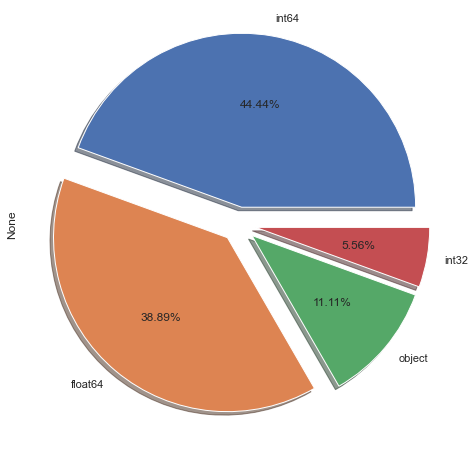

In [148]:
plt.figure(figsize = (15 , 8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1] , autopct='%1.2f%%' , shadow=True)

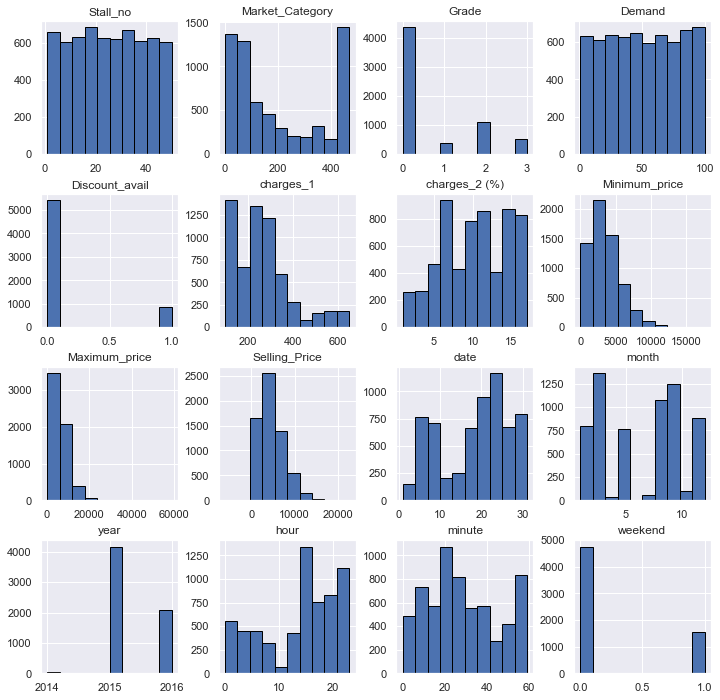

In [149]:
df.hist(edgecolor='black',figsize=(12,12));

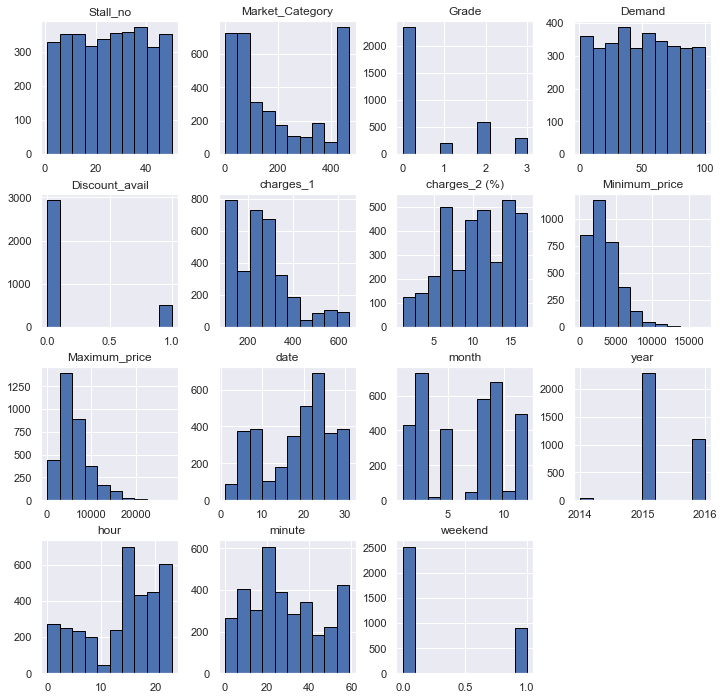

In [150]:
tt.hist(edgecolor='black',figsize=(12,12));

The number of unique values in Loyalty_customer column is/are : 2


The unique values in Loyalty_customer column is/are : ['Yes' 'No ']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Loyalty_customer column is/are :  
Yes    3862
No     2465
Name: Loyalty_customer, dtype: int64





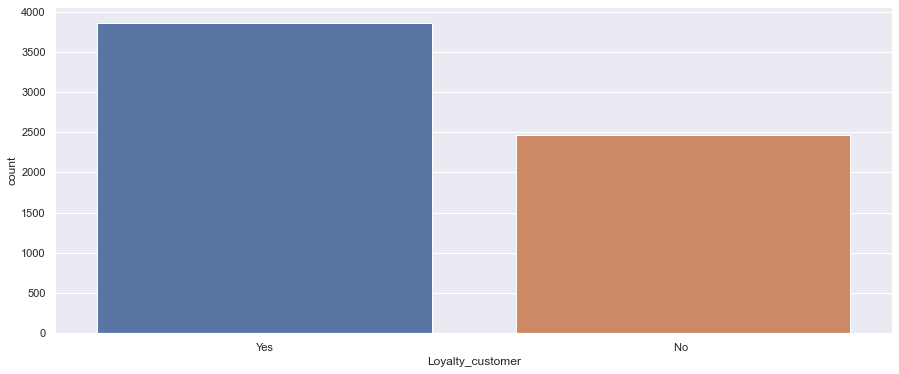

****************************************************************************************************



The number of unique values in Product_Category column is/are : 10


The unique values in Product_Category column is/are : ['Fashion' 'Child_care' 'Educational' 'Repair' 'Technology' 'Cosmetics'
 'Hospitality' 'Organic' 'Pet_care' 'Home_decor']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Product_Category column is/are :  
Pet_care       679
Repair         666
Child_care     655
Cosmetics      644
Hospitality    628
Organic        618
Technology     617
Home_decor     611
Educational    605
Fashion        604
Name: Product_Category, dtype: int64





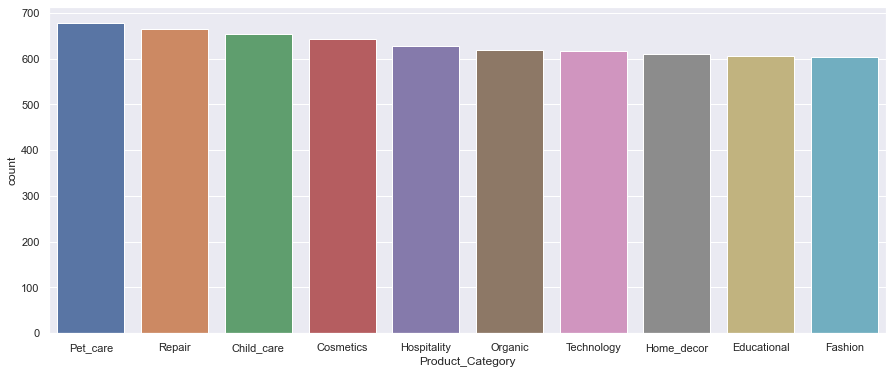

****************************************************************************************************





In [151]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {df[i].isna().sum()} and the percentage of {df[i].isna().sum() * 100 / len(df)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    plt.figure(figsize = (15 , 6))
    sns.countplot(data = df , x = i , order = df[i].value_counts().index)
    plt.show()
    print("*"*100)
    print("\n\n")

The number of unique values in Loyalty_customer column is/are : 2


The unique values in Loyalty_customer column is/are : ['No ' 'Yes']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Loyalty_customer column is/are :  
Yes    2087
No     1343
Name: Loyalty_customer, dtype: int64





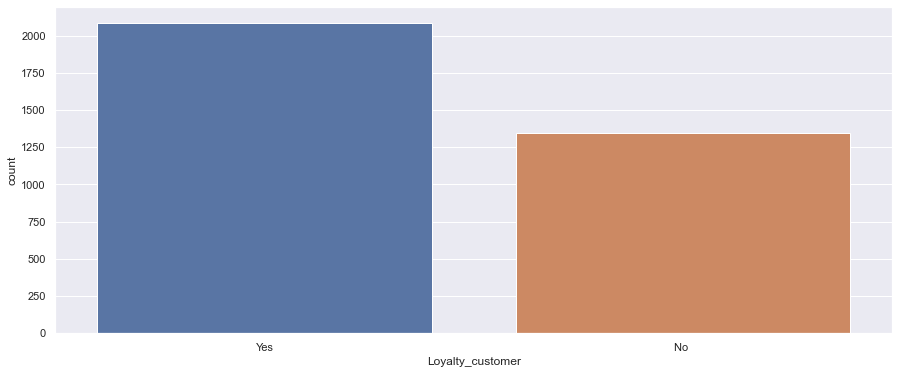

****************************************************************************************************



The number of unique values in Product_Category column is/are : 10


The unique values in Product_Category column is/are : ['Fashion' 'Technology' 'Child_care' 'Hospitality' 'Organic' 'Pet_care'
 'Repair' 'Home_decor' 'Cosmetics' 'Educational']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Product_Category column is/are :  
Educational    355
Child_care     348
Cosmetics      348
Pet_care       346
Repair         345
Fashion        345
Technology     340
Home_decor     340
Organic        336
Hospitality    327
Name: Product_Category, dtype: int64





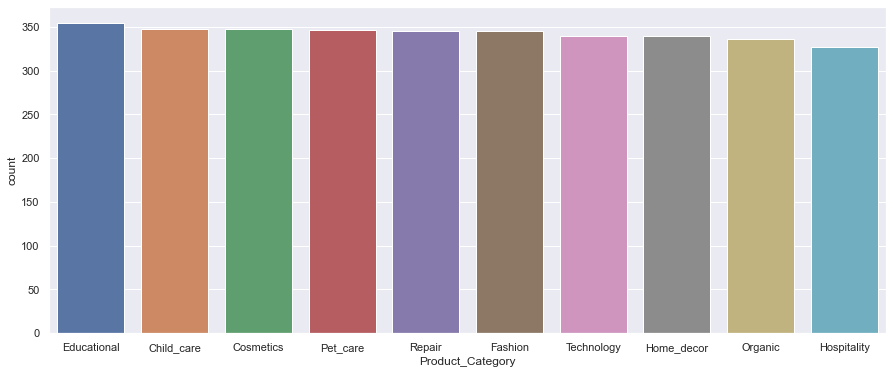

****************************************************************************************************





In [152]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(tt[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {tt[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {tt[i].isna().sum()} and the percentage of {tt[i].isna().sum() * 100 / len(tt)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{tt[i].value_counts()}")
    print("\n\n")
    plt.figure(figsize = (15 , 6))
    sns.countplot(data = tt , x = i , order = tt[i].value_counts().index)
    plt.show()
    print("*"*100)
    print("\n\n")

No missing data in categorical columns

In [153]:
df.loc[df["Selling_Price"] < 0]

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  \
50         3.0                0              Yes       Child_care      0   
952       22.0               23              Yes         Pet_care      2   
1000      15.0              437              No        Child_care      0   
1115      14.0               55              Yes         Pet_care      0   
1348      44.0              256              Yes           Repair      0   
1674      46.0              283              Yes         Pet_care      0   
2035      41.0              236              Yes      Hospitality      0   
2486      14.0              437              Yes       Child_care      0   
3890      28.0                1              Yes        Cosmetics      0   
4188      28.0               14              No       Hospitality      0   
4244       4.0               65              Yes         Pet_care      2   
4398      20.0              447              Yes         Pet_care      0   
5313       5.0              342              No        Home_decor      0   
5551      31.0              423              No        Technology      0   

      Demand  Discount_avail  charges_1  charges_2 (%)  Minimum_price  \
50        27             0.0      289.0           16.0         2368.0   
952       12             0.0      102.0            5.0         1390.0   
1000      74             0.0      254.0           14.0         3885.0   
1115      77             0.0      169.0            7.0         3829.0   
1348      22             0.0      285.0            2.0         2873.0   
1674      57             0.0      135.0            4.0         1975.0   
2035      10             0.0      255.0            9.0         1320.0   
2486      19             0.0      331.0           17.0         4044.0   
3890       1             0.0      208.0           16.0         2614.0   
4188      23             1.0      325.0            9.0         4322.0   
4244      87             0.0      191.0           11.0         4616.0   
4398      76             0.0      197.0           11.0         4052.0   
5313      78             0.0        NaN           17.0         1982.0   
5551      79             0.0      529.0            6.0         3157.0   

      Maximum_price  Selling_Price  date  month  year  hour  minute  weekend  
50           4231.0   -3584.795550     1     11  2014     9      46        1  
952          5665.0   -3630.896874    18     10  2014    23      59        1  
1000         5485.0   -4896.104400    19      1  2015    17      23        0  
1115         6083.0   -5077.185300     6      5  2015    16      21        0  
1348         6511.0   -4965.495150     1      3  2015     0      31        1  
1674         2601.0   -2408.406912     5      5  2015    13      19        0  
2035         7873.0   -4855.154436    29     10  2014    12      46        0  
2486         5395.0   -5058.014148     9     11  2014    20      15        1  
3890         4891.0   -3966.103350     6      5  2015    14      20        0  
4188            NaN    -822.810319    16      8  2015    23      12        1  
4244         7291.0   -6062.470000     9      5  2015    17      18        1  
4398         4817.0      -4.000000     9      5  2015    13      21        1  
5313         3752.0   -3133.221300    12     11  2014    18      41        0  
5551         7563.0   -5833.297800     5      5  2015    17      21        0

In [154]:
df["Selling_Price"] = abs(df["Selling_Price"])
df = df.reset_index(drop = True)
df.head()

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  Demand  \
0      37.0                2              Yes          Fashion      1      68   
1      38.0               24              Yes          Fashion      0      51   
2       9.0              447              Yes       Child_care      0      10   
3      50.0               23              Yes      Educational      2      48   
4       7.0               63              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   

   Selling_Price  date  month  year  hour  minute  weekend  
0    4185.947700    22      8  2015    18      36        1  
1    9271.490256    27      3  2016    21      19        1  
2    6785.701362    18      8  2015    19      25        0  
3   13028.917824    28      3  2016    21      53        0  
4     906.553935    29      3  2016    22      58        0

In [155]:
df.describe()

Stall_no  Market_Category        Grade       Demand  Discount_avail  \
count  6322.000000      6327.000000  6327.000000  6327.000000     6290.000000   
mean     25.312243       199.100205     0.644065    50.922554        0.140064   
std      14.331376       170.306880     1.025477    29.090574        0.347081   
min       1.000000         0.000000     0.000000     1.000000        0.000000   
25%      13.000000        55.000000     0.000000    26.000000        0.000000   
50%      25.000000       131.000000     0.000000    51.000000        0.000000   
75%      37.000000       403.000000     2.000000    76.000000        0.000000   
max      50.000000       471.000000     3.000000   100.000000        1.000000   

         charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
count  6129.000000    6123.000000    6289.000000    5986.000000   
mean    264.657203      10.152866    3533.844490    6436.084698   
std     124.530510       4.317195    2193.700577    3717.051208   
min     100.000000       1.000000       1.000000     404.000000   
25%     163.000000       7.000000    1882.000000    3922.250000   
50%     253.000000      10.000000    3164.000000    5638.500000   
75%     315.000000      14.000000    4697.000000    8126.750000   
max     649.000000      17.000000   17580.000000   58812.000000   

       Selling_Price         date        month         year         hour  \
count    6327.000000  6327.000000  6327.000000  6327.000000  6327.000000   
mean     4580.406478    17.880828     6.394184  2015.321637    13.753122   
std      2952.640478     8.081725     3.328920     0.486373     6.899582   
min         4.000000     1.000000     1.000000  2014.000000     0.000000   
25%      2461.805312     9.000000     3.000000  2015.000000     7.000000   
50%      4215.972992    20.000000     8.000000  2015.000000    15.000000   
75%      6167.643252    24.000000     9.000000  2016.000000    19.000000   
max     22638.325941    31.000000    12.000000  2016.000000    23.000000   

            minute      weekend  
count  6327.000000  6327.000000  
mean     28.074127     0.247037  
std      16.726512     0.431322  
min       0.000000     0.000000  
25%      15.000000     0.000000  
50%      25.000000     0.000000  
75%      41.000000     0.000000  
max      59.000000     1.000000

<AxesSubplot:>

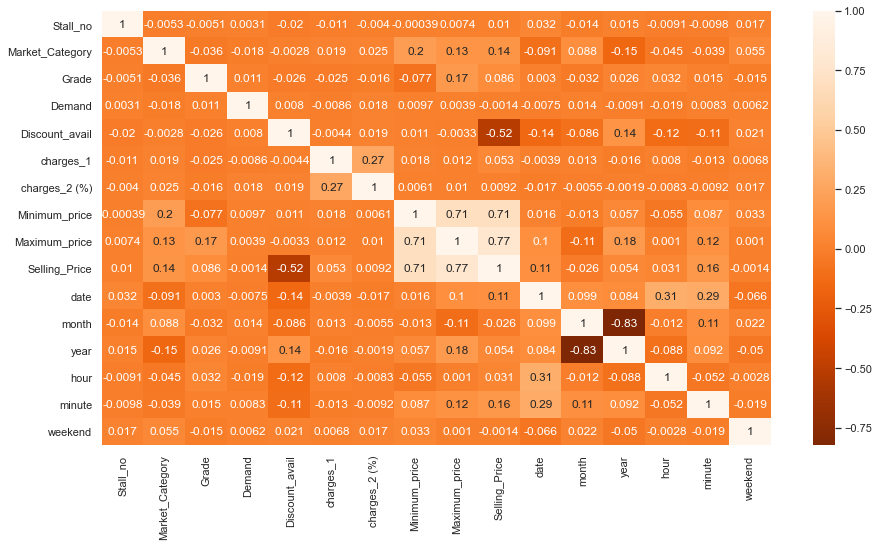

In [156]:
plt.figure(figsize = (15 , 8))
sns.heatmap(df.corr() , annot = True , cmap = "Oranges_r")

In [157]:
df.head()

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  Demand  \
0      37.0                2              Yes          Fashion      1      68   
1      38.0               24              Yes          Fashion      0      51   
2       9.0              447              Yes       Child_care      0      10   
3      50.0               23              Yes      Educational      2      48   
4       7.0               63              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0             0.0      376.0           11.0         2983.0         4713.0   
1             0.0      397.0           12.0         7495.0        10352.0   
2             0.0      250.0            9.0         5752.0         7309.0   
3             0.0      144.0           13.0         5090.0        20814.0   
4             1.0      211.0            4.0         2430.0         9261.0   

   Selling_Price  date  month  year  hour  minute  weekend  
0    4185.947700    22      8  2015    18      36        1  
1    9271.490256    27      3  2016    21      19        1  
2    6785.701362    18      8  2015    19      25        0  
3   13028.917824    28      3  2016    21      53        0  
4     906.553935    29      3  2016    22      58        0

In [158]:
df.isna().sum()

Stall_no              5
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
date                  0
month                 0
year                  0
hour                  0
minute                0
weekend               0
dtype: int64

In [159]:
df.groupby("Product_Category")["Minimum_price"].mean()

Product_Category
Child_care     3563.162328
Cosmetics      3585.574766
Educational    3416.940000
Fashion        3583.697674
Home_decor     3537.019769
Hospitality    3504.515974
Organic        3403.085246
Pet_care       3613.413333
Repair         3551.603631
Technology     3564.061990
Name: Minimum_price, dtype: float64

In [160]:
df.groupby("Product_Category")["Maximum_price"].mean()

Product_Category
Child_care     6557.469821
Cosmetics      6619.071895
Educational    6143.335088
Fashion        6558.836268
Home_decor     6436.330479
Hospitality    6463.295110
Organic        6350.550336
Pet_care       6448.784615
Repair         6484.773885
Technology     6272.823427
Name: Maximum_price, dtype: float64

In [161]:
df["Minimum_price"].median() , df["Minimum_price"].mean()

(3164.0, 3533.8444903800287)

In [162]:
df["Maximum_price"].median() , df["Maximum_price"].mean()

(5638.5, 6436.084697627798)

In [163]:
for i in ["Minimum_price" , "Maximum_price" , "charges_1" , "charges_2 (%)" , "Stall_no" , "Discount_avail"]:
    for j in list(np.where(df[i].isna())[0]):
        temp = df.groupby("Product_Category")[i].mean()
        df.loc[j , i] = temp[df.loc[j , "Product_Category"]]

In [164]:
for i in ["Minimum_price" , "Maximum_price" , "charges_1" , "charges_2 (%)"  , "Stall_no" , "Discount_avail"]:
    for j in list(np.where(tt[i].isna())[0]):
        temp = df.groupby("Product_Category")[i].mean()
        tt.loc[j , i] = temp[df.loc[j , "Product_Category"]]

In [165]:
df.isna().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
date                0
month               0
year                0
hour                0
minute              0
weekend             0
dtype: int64

In [166]:
tt.isna().sum()

Stall_no            0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
date                0
month               0
year                0
hour                0
minute              0
weekend             0
dtype: int64

In [167]:
df["Avg_price"] = (df["Minimum_price"] + df["Maximum_price"]) / 2
df["7th_price"] = df["Minimum_price"] * 0.3 + df["Maximum_price"] * 0.7
df["3th_price"] = df["Minimum_price"] * 0.7 + df["Maximum_price"] * 0.3

In [168]:
tt["Avg_price"] = (tt["Minimum_price"] + tt["Maximum_price"]) / 2
tt["7th_price"] = tt["Minimum_price"] * 0.3 + tt["Maximum_price"] * 0.7
tt["3th_price"] = tt["Minimum_price"] * 0.7 + tt["Maximum_price"] * 0.3

In [169]:
df.corr()["Selling_Price"].sort_values(ascending = False)

Selling_Price      1.000000
Avg_price          0.796682
3th_price          0.786994
7th_price          0.786337
Maximum_price      0.756242
Minimum_price      0.703274
minute             0.162882
Market_Category    0.140552
date               0.108953
Grade              0.085598
year               0.053699
charges_1          0.052256
hour               0.031313
Stall_no           0.010459
charges_2 (%)      0.009905
weekend           -0.001381
Demand            -0.001432
month             -0.026353
Discount_avail    -0.518353
Name: Selling_Price, dtype: float64

In [170]:
df["year"].value_counts()

2015    4176
2016    2093
2014      58
Name: year, dtype: int64

In [171]:
df["year"] = 2016 - df["year"]
tt["year"] = 2016 - tt["year"]

In [172]:
df["year"].value_counts()

1    4176
0    2093
2      58
Name: year, dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          6327 non-null   float64
 1   Market_Category   6327 non-null   int64  
 2   Loyalty_customer  6327 non-null   object 
 3   Product_Category  6327 non-null   object 
 4   Grade             6327 non-null   int64  
 5   Demand            6327 non-null   int64  
 6   Discount_avail    6327 non-null   float64
 7   charges_1         6327 non-null   float64
 8   charges_2 (%)     6327 non-null   float64
 9   Minimum_price     6327 non-null   float64
 10  Maximum_price     6327 non-null   float64
 11  Selling_Price     6327 non-null   float64
 12  date              6327 non-null   int64  
 13  month             6327 non-null   int64  
 14  year              6327 non-null   int64  
 15  hour              6327 non-null   int64  
 16  minute            6327 non-null   int64  


In [174]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   float64
 1   Market_Category   3430 non-null   int64  
 2   Loyalty_customer  3430 non-null   object 
 3   Product_Category  3430 non-null   object 
 4   Grade             3430 non-null   int64  
 5   Demand            3430 non-null   int64  
 6   Discount_avail    3430 non-null   int64  
 7   charges_1         3430 non-null   float64
 8   charges_2 (%)     3430 non-null   float64
 9   Minimum_price     3430 non-null   float64
 10  Maximum_price     3430 non-null   int64  
 11  date              3430 non-null   int64  
 12  month             3430 non-null   int64  
 13  year              3430 non-null   int64  
 14  hour              3430 non-null   int64  
 15  minute            3430 non-null   int64  
 16  weekend           3430 non-null   int32  


<AxesSubplot:ylabel='None'>

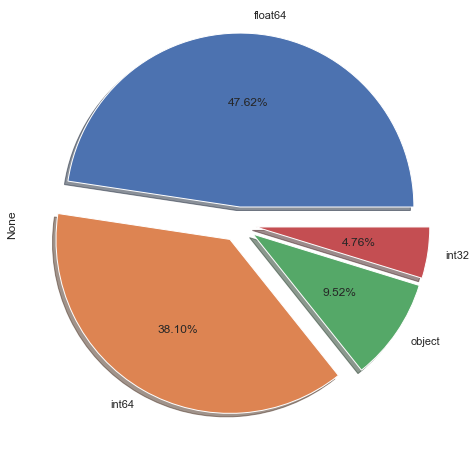

In [175]:
plt.figure(figsize = (15 , 8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1] , autopct='%1.2f%%' , shadow=True)

In [176]:
df.head()

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  Demand  \
0      37.0                2              Yes          Fashion      1      68   
1      38.0               24              Yes          Fashion      0      51   
2       9.0              447              Yes       Child_care      0      10   
3      50.0               23              Yes      Educational      2      48   
4       7.0               63              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  ...  \
0             0.0      376.0           11.0         2983.0  ...   
1             0.0      397.0           12.0         7495.0  ...   
2             0.0      250.0            9.0         5752.0  ...   
3             0.0      144.0           13.0         5090.0  ...   
4             1.0      211.0            4.0         2430.0  ...   

   Selling_Price  date  month  year  hour  minute  weekend  Avg_price  \
0    4185.947700    22      8     1    18      36        1     3848.0   
1    9271.490256    27      3     0    21      19        1     8923.5   
2    6785.701362    18      8     1    19      25        0     6530.5   
3   13028.917824    28      3     0    21      53        0    12952.0   
4     906.553935    29      3     0    22      58        0     5845.5   

   7th_price  3th_price  
0     4194.0     3502.0  
1     9494.9     8352.1  
2     6841.9     6219.1  
3    16096.8     9807.2  
4     7211.7     4479.3  

[5 rows x 21 columns]

In [177]:
tt.head()

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  Demand  \
0      39.0              205              No           Fashion      0      90   
1      49.0                3              Yes          Fashion      0      87   
2       1.0              183              No        Technology      2      55   
3       8.0              358              Yes       Child_care      3      86   
4      33.0              167              No        Technology      0      27   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  Maximum_price  \
0               0      380.0           16.0         2576.0           3340   
1               0      393.0           16.0         1202.0           1955   
2               0      493.0            9.0         7175.0          15715   
3               0      303.0           16.0         5404.0          13078   
4               0      567.0           16.0         4069.0           6244   

   date  month  year  hour  minute  weekend  Avg_price  7th_price  3th_price  
0    13      1     0     7      45        0     2958.0     3110.8     2805.2  
1    23      8     1    20      37        1     1578.5     1729.1     1427.9  
2    14     11     1    18      12        1    11445.0    13153.0     9737.0  
3    21     11     1     4      56        1     9241.0    10775.8     7706.2  
4     6      5     1    15       9        0     5156.5     5591.5     4721.5

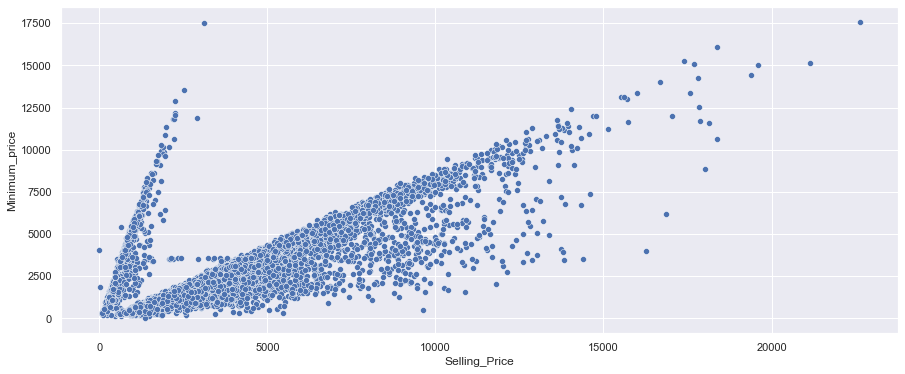

In [178]:
plt.figure(figsize = (15 , 6))
sns.scatterplot(y = "Minimum_price" , x = "Selling_Price" , data = df);

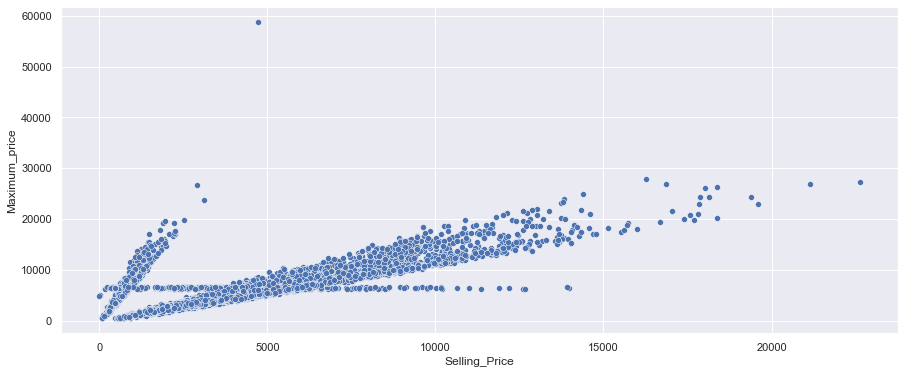

In [179]:
plt.figure(figsize = (15 , 6))
sns.scatterplot(y = "Maximum_price" , x = "Selling_Price" , data = df);

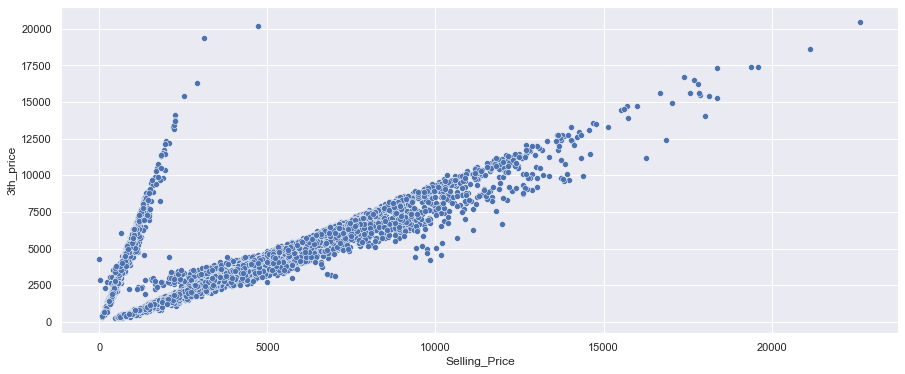

In [180]:
plt.figure(figsize = (15 , 6))
sns.scatterplot(y = "3th_price" , x = "Selling_Price" , data = df);

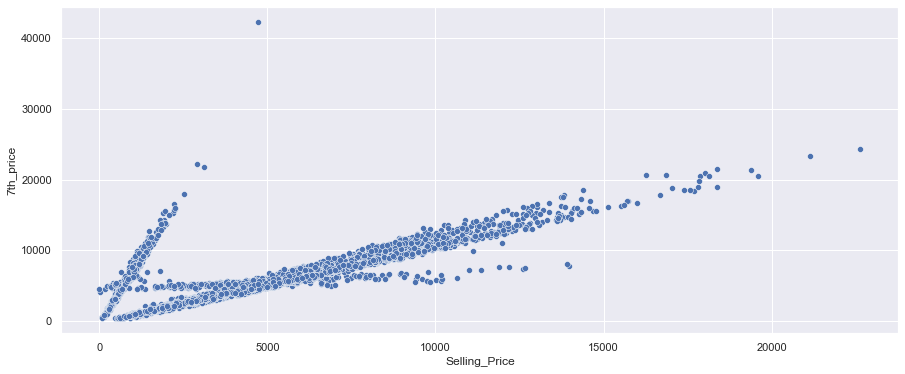

In [181]:
plt.figure(figsize = (15 , 6))
sns.scatterplot(y = "7th_price" , x = "Selling_Price" , data = df);

In [182]:
df.head()

Stall_no  Market_Category Loyalty_customer Product_Category  Grade  Demand  \
0      37.0                2              Yes          Fashion      1      68   
1      38.0               24              Yes          Fashion      0      51   
2       9.0              447              Yes       Child_care      0      10   
3      50.0               23              Yes      Educational      2      48   
4       7.0               63              Yes           Repair      1      35   

   Discount_avail  charges_1  charges_2 (%)  Minimum_price  ...  \
0             0.0      376.0           11.0         2983.0  ...   
1             0.0      397.0           12.0         7495.0  ...   
2             0.0      250.0            9.0         5752.0  ...   
3             0.0      144.0           13.0         5090.0  ...   
4             1.0      211.0            4.0         2430.0  ...   

   Selling_Price  date  month  year  hour  minute  weekend  Avg_price  \
0    4185.947700    22      8     1    18      36        1     3848.0   
1    9271.490256    27      3     0    21      19        1     8923.5   
2    6785.701362    18      8     1    19      25        0     6530.5   
3   13028.917824    28      3     0    21      53        0    12952.0   
4     906.553935    29      3     0    22      58        0     5845.5   

   7th_price  3th_price  
0     4194.0     3502.0  
1     9494.9     8352.1  
2     6841.9     6219.1  
3    16096.8     9807.2  
4     7211.7     4479.3  

[5 rows x 21 columns]

In [183]:
df = pd.get_dummies(df , columns = ["Loyalty_customer" , "Product_Category"])

In [184]:
df.head()

Stall_no  Market_Category  Grade  Demand  Discount_avail  charges_1  \
0      37.0                2      1      68             0.0      376.0   
1      38.0               24      0      51             0.0      397.0   
2       9.0              447      0      10             0.0      250.0   
3      50.0               23      2      48             0.0      144.0   
4       7.0               63      1      35             1.0      211.0   

   charges_2 (%)  Minimum_price  Maximum_price  Selling_Price  ...  \
0           11.0         2983.0         4713.0    4185.947700  ...   
1           12.0         7495.0        10352.0    9271.490256  ...   
2            9.0         5752.0         7309.0    6785.701362  ...   
3           13.0         5090.0        20814.0   13028.917824  ...   
4            4.0         2430.0         9261.0     906.553935  ...   

   Product_Category_Child_care  Product_Category_Cosmetics  \
0                            0                           0   
1                            0                           0   
2                            1                           0   
3                            0                           0   
4                            0                           0   

   Product_Category_Educational  Product_Category_Fashion  \
0                             0                         1   
1                             0                         1   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   Product_Category_Home_decor  Product_Category_Hospitality  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Product_Category_Organic  Product_Category_Pet_care  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Product_Category_Repair  Product_Category_Technology  
0                        0                            0  
1                        0                            0  
2                        0                            0  
3                        0                            0  
4                        1                            0  

[5 rows x 31 columns]

In [185]:
tt = pd.get_dummies(tt , columns = ["Loyalty_customer" , "Product_Category"])

In [186]:
tt.head()

Stall_no  Market_Category  Grade  Demand  Discount_avail  charges_1  \
0      39.0              205      0      90               0      380.0   
1      49.0                3      0      87               0      393.0   
2       1.0              183      2      55               0      493.0   
3       8.0              358      3      86               0      303.0   
4      33.0              167      0      27               0      567.0   

   charges_2 (%)  Minimum_price  Maximum_price  date  ...  \
0           16.0         2576.0           3340    13  ...   
1           16.0         1202.0           1955    23  ...   
2            9.0         7175.0          15715    14  ...   
3           16.0         5404.0          13078    21  ...   
4           16.0         4069.0           6244     6  ...   

   Product_Category_Child_care  Product_Category_Cosmetics  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            1                           0   
4                            0                           0   

   Product_Category_Educational  Product_Category_Fashion  \
0                             0                         1   
1                             0                         1   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   Product_Category_Home_decor  Product_Category_Hospitality  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Product_Category_Organic  Product_Category_Pet_care  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Product_Category_Repair  Product_Category_Technology  
0                        0                            0  
1                        0                            0  
2                        0                            1  
3                        0                            0  
4                        0                            1  

[5 rows x 30 columns]

In [187]:
X = df.drop(["Selling_Price"] , axis = 1)
y = df["Selling_Price"]

In [188]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(5061, 1266, 5061, 1266)

In [189]:
ints

['Stall_no',
 'Market_Category',
 'Grade',
 'Demand',
 'Discount_avail',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'date',
 'month',
 'year',
 'hour',
 'minute',
 'weekend']

In [190]:
ints.remove("Discount_avail")
ints.remove("weekend")
for i in ["Avg_price" , "3th_price" , "7th_price"]:
    ints.append(i)
ints    

['Stall_no',
 'Market_Category',
 'Grade',
 'Demand',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'date',
 'month',
 'year',
 'hour',
 'minute',
 'Avg_price',
 '3th_price',
 '7th_price']

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [192]:
X_train.head().T

4192      1170      2598      4677      2542
Stall_no                      0.054488  0.194017 -1.271037 -1.410566  1.310248
Market_Category              -0.195687  0.924217  0.027121 -0.565079  0.701409
Grade                        -0.630291  2.289975 -0.630291 -0.630291 -0.630291
Demand                       -0.904258 -0.869852  0.059104  0.368756  0.953654
Discount_avail                0.000000  0.000000  1.000000  1.000000  0.000000
charges_1                    -0.452974  2.428054 -0.976066 -1.112875 -1.217493
charges_2 (%)                 1.360116 -0.735783 -0.735783 -0.270028 -0.502905
Minimum_price                 0.274327 -0.447946 -0.184839 -1.221546 -0.832203
Maximum_price                -0.003303  0.094439 -0.671667 -0.117150 -0.028696
date                         -1.586041  0.516680  0.516680  0.392991  0.764059
month                        -0.434189  0.468370 -1.336748 -1.336748 -0.735042
year                          0.647767  0.647767 -1.414088 -1.414088  0.647767
hour                          0.030137  1.047923 -2.005435 -2.005435 -0.406057
minute                       -1.144942  1.134842  1.734785  0.474905  1.794779
weekend                       0.000000  1.000000  0.000000  1.000000  0.000000
Avg_price                     0.109381 -0.118274 -0.530311 -0.576406 -0.358055
7th_price                     0.056542 -0.017513 -0.604291 -0.362561 -0.204057
3th_price                     0.172666 -0.241599 -0.421682 -0.828609 -0.541347
Loyalty_customer_No           0.000000  1.000000  1.000000  0.000000  0.000000
Loyalty_customer_Yes          1.000000  0.000000  0.000000  1.000000  1.000000
Product_Category_Child_care   0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Cosmetics    1.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Educational  0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Fashion      0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Home_decor   0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Hospitality  0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Organic      0.000000  0.000000  1.000000  1.000000  1.000000
Product_Category_Pet_care     0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Repair       0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Technology   0.000000  1.000000  0.000000  0.000000  0.000000

In [193]:
X_test.head().T

1057      5865      3197      3560      4352
Stall_no                      1.100954 -1.271037 -0.712921 -1.410566  0.682368
Market_Category              -0.013922  0.115072  0.109209  0.396514  1.575050
Grade                        -0.630291  1.316553 -0.630291  1.316553 -0.630291
Demand                       -0.629012  1.194494 -0.904258  1.332117 -0.147331
Discount_avail                0.000000  1.000000  1.000000  0.000000  0.000000
charges_1                    -1.193350 -0.050596 -0.227643 -0.114617  0.166688
charges_2 (%)                -1.201538 -0.037150  0.661483  1.592993  0.661483
Minimum_price                -0.531179  0.254906  4.003606 -1.244204  0.999837
Maximum_price                -0.841327 -0.327072  3.070005 -0.793011  0.533443
date                          0.764059 -1.462351  0.516680  0.764059  0.021922
month                         0.769223 -1.637601 -1.035895  0.769223 -1.035895
year                          0.647767 -1.414088 -1.414088  0.647767 -1.414088
hour                          0.030137 -1.133047 -1.714639  0.320933 -1.423843
minute                       -0.005050 -1.324925 -1.444913 -0.305021 -1.564902
weekend                       0.000000  0.000000  0.000000  0.000000  0.000000
Avg_price                    -0.786188 -0.117898  3.709156 -1.043570  0.768265
7th_price                    -0.821725 -0.219683  3.445065 -0.935308  0.664384
3th_price                    -0.718437  0.013637  3.932807 -1.149227  0.876474
Loyalty_customer_No           0.000000  1.000000  0.000000  1.000000  0.000000
Loyalty_customer_Yes          1.000000  0.000000  1.000000  0.000000  1.000000
Product_Category_Child_care   0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Cosmetics    0.000000  0.000000  1.000000  0.000000  0.000000
Product_Category_Educational  0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Fashion      0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Home_decor   0.000000  0.000000  0.000000  1.000000  0.000000
Product_Category_Hospitality  0.000000  1.000000  0.000000  0.000000  1.000000
Product_Category_Organic      1.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Pet_care     0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Repair       0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Technology   0.000000  0.000000  0.000000  0.000000  0.000000

In [194]:
tt.head().T

0         1         2         3         4
Stall_no                      0.961426  1.659070 -1.689624 -1.201273  0.542839
Market_Category               0.027121 -1.157279 -0.101873  0.924217 -0.195687
Grade                        -0.630291 -0.630291  1.316553  2.289975 -0.630291
Demand                        1.332117  1.228900  0.127915  1.194494 -0.835446
Discount_avail                0.000000  0.000000  0.000000  0.000000  0.000000
charges_1                     0.923159  1.027777  1.832534  0.303497  2.428054
charges_2 (%)                 1.360116  1.360116 -0.270028  1.360116  1.360116
Minimum_price                -0.445172 -1.080513  1.681419  0.862503  0.245196
Maximum_price                -0.864651 -1.249231  2.571578  1.839349 -0.058283
date                         -0.596525  0.640370 -0.472835  0.392991 -1.462351
month                        -1.637601  0.468370  1.370929  1.370929 -0.434189
year                         -1.414088  0.647767  0.647767  0.647767  0.647767
hour                         -0.987649  0.902525  0.611729 -1.423843  0.175535
minute                        1.014853  0.534899 -0.964959  1.674791 -1.144942
weekend                       0.000000  1.000000  1.000000  1.000000  0.000000
Avg_price                    -0.766997 -1.286089  2.426573  1.597231  0.060276
7th_price                    -0.822725 -1.283222  2.524170  1.731890  0.004050
3th_price                    -0.674402 -1.252017  2.232673  1.380991  0.129260
Loyalty_customer_No           1.000000  0.000000  1.000000  0.000000  1.000000
Loyalty_customer_Yes          0.000000  1.000000  0.000000  1.000000  0.000000
Product_Category_Child_care   0.000000  0.000000  0.000000  1.000000  0.000000
Product_Category_Cosmetics    0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Educational  0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Fashion      1.000000  1.000000  0.000000  0.000000  0.000000
Product_Category_Home_decor   0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Hospitality  0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Organic      0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Pet_care     0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Repair       0.000000  0.000000  0.000000  0.000000  0.000000
Product_Category_Technology   0.000000  0.000000  1.000000  0.000000  1.000000

In [195]:
for i in X_train.columns:
    if i not in tt.columns:
        print(i)

In [196]:
for i in tt.columns:
    if i not in X_train.columns:
        print(i)

In [197]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [198]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(["CatBoost Regressor" , CatBoostRegressor(random_state = 42 , verbose = 0 , )])
models.append(["Light GBMRegressor" , LGBMRegressor(random_state = 42)])
models.append(["Gradient Boosting" , GradientBoostingRegressor(random_state = 42)])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [203]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    preds[preds < 0] = 0
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    rmse = mean_squared_error(y_test , preds , squared = False)
    mae = mean_absolute_error(y_test , preds)
    score = max(0 , 100 - mean_squared_log_error(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Root Mean Squared Error : {rmse:.4f}")
    print("\n")

#     print(f"Mean Squared Log Error : {log:.4f}")
#     print("\n")
    
    print(f"RMSLE_Score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(rmse)
#     sam.append(log)
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.9997


Test Score : 0.9925


K-fold accuracy : 0.9856


Standard Deviation of Accuracies in k-fold : 0.0055


Mean Absolute Error : 108.3218


Root Mean Squared Error : 263.9862


RMSLE_Score : 99.9519




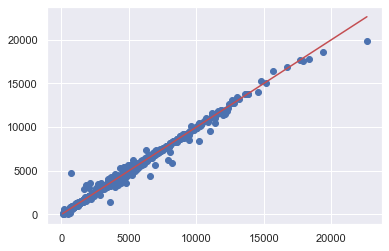



****************************************************************************************************





CatBoost Regressor


Training score : 0.9978


Test Score : 0.9920


K-fold accuracy : 0.9874


Standard Deviation of Accuracies in k-fold : 0.0039


Mean Absolute Error : 105.6806


Root Mean Squared Error : 272.1963


RMSLE_Score : 99.9122




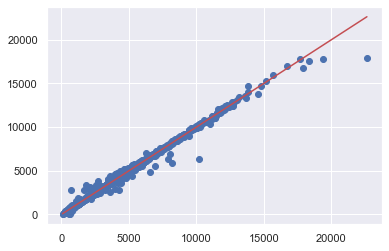



****************************************************************************************************





Light GBMRegressor


Training score : 0.9942


Test Score : 0.9900


K-fold accuracy : 0.9852


Standard Deviation of Accuracies in k-fold : 0.0045


Mean Absolute Error : 117.5594


Root Mean Squared Error : 304.3801


RMSLE_Score : 99.9886




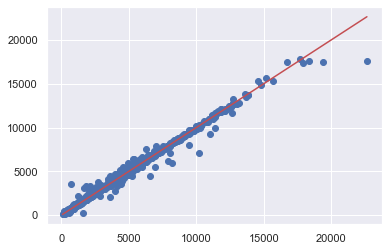



****************************************************************************************************





Gradient Boosting


Training score : 0.9904


Test Score : 0.9887


K-fold accuracy : 0.9838


Standard Deviation of Accuracies in k-fold : 0.0050


Mean Absolute Error : 134.5266


Root Mean Squared Error : 324.0663


RMSLE_Score : 99.9213




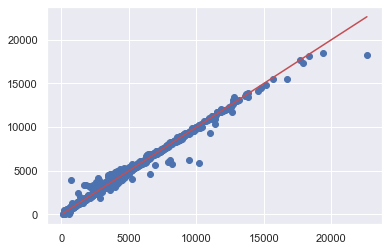



****************************************************************************************************





RandomForest Regressor


Training score : 0.9980


Test Score : 0.9919


K-fold accuracy : 0.9862


Standard Deviation of Accuracies in k-fold : 0.0051


Mean Absolute Error : 89.7006


Root Mean Squared Error : 274.7249


RMSLE_Score : 99.9928




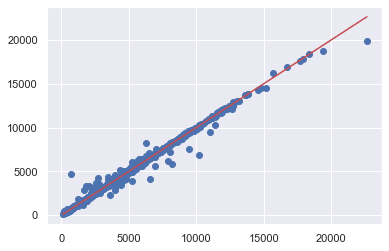



****************************************************************************************************





KNeigbors Regressor


Training score : 0.7945


Test Score : 0.7137


K-fold accuracy : 0.6803


Standard Deviation of Accuracies in k-fold : 0.0339


Mean Absolute Error : 995.2032


Root Mean Squared Error : 1631.4958


RMSLE_Score : 99.5811




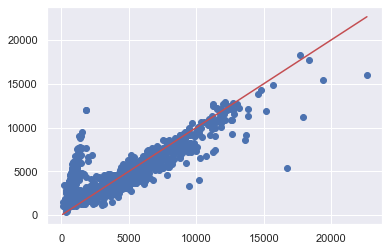



****************************************************************************************************



Wall time: 1min 42s


In [204]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [205]:
pre_final

[(['XGBRegressor',
   0.9996729747886768,
   0.9925021384071852,
   0.9855761656520354,
   0.005519953883157107,
   108.32176747532195,
   263.98621370815437,
   99.95192098366871],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['CatBoost Regressor',
   0.9978236731987838,
   0.9919612247509867,
   0.9874473095705636,
   0.003930172928344217,
   105.6805976079764,
   272.1962724924759,
   99.91224862116114],
  <catboost.core.CatBoostRegressor at 0

In [206]:
data_pre_final = [x[0] for x in pre_final]

In [207]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "RMSLE_Score"])

me.sort_values(by = ["RMSLE_Score" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , False , True , False , False))
me = me.reset_index(drop = True)

me

Model  Train Score  Test Score  K-fold Accuracy  \
0  RandomForest Regressor     0.998023    0.991882         0.986243   
1      Light GBMRegressor     0.994199    0.990035         0.985191   
2            XGBRegressor     0.999673    0.992502         0.985576   
3       Gradient Boosting     0.990424    0.988692         0.983845   
4      CatBoost Regressor     0.997824    0.991961         0.987447   
5     KNeigbors Regressor     0.794496    0.713693         0.680334   

   K-fold Std         MAE         RMSE  RMSLE_Score  
0    0.005060   89.700576   274.724866    99.992807  
1    0.004512  117.559368   304.380116    99.988588  
2    0.005520  108.321767   263.986214    99.951921  
3    0.004978  134.526598   324.066268    99.921341  
4    0.003930  105.680598   272.196272    99.912249  
5    0.033928  995.203166  1631.495820    99.581082

In [208]:
from sklearn.model_selection import GridSearchCV



Random Forest Regressor


Best Parameters are : 
 {'bootstrap': True, 'max_depth': 4, 'n_estimators': 300}


Training score : -0.0434


Test Score : -0.0283


K-fold accuracy : -0.0452


Standard Deviation of Accuracies in k-fold : 0.0306


Mean Absolute Error : 270.8415


Root Mean Squared Error : 534.6380


RMSLE_Score : 99.9717




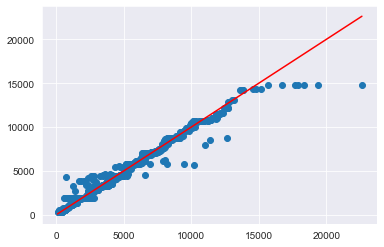



****************************************************************************************************



Wall time: 10min 7s


In [114]:
%%time

grid_random = {"n_estimators" : [100 , 200 , 300 , 400] , 
               "max_depth" : [2 , 4] ,
               "bootstrap" : [True , False]}

random = metrics(['Random Forest Regressor', GridSearchCV(RandomForestRegressor(random_state = 42 , n_jobs = -1) , param_grid = grid_random , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error")] ,  X_train , y_train , X_test , y_test , params = True )

In [209]:
random = pre_final[4][1]

In [210]:
max(0 , 100 - mean_squared_log_error(y_test , random.predict(X_test)))

99.99280747874498

In [211]:
preds = random.predict(tt)
preds

array([ 3288.65976314,  1953.16721624, 11826.30934386, ...,
        5916.83870643,  3592.05167967,  1008.66138224])

In [212]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns)) , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 15))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

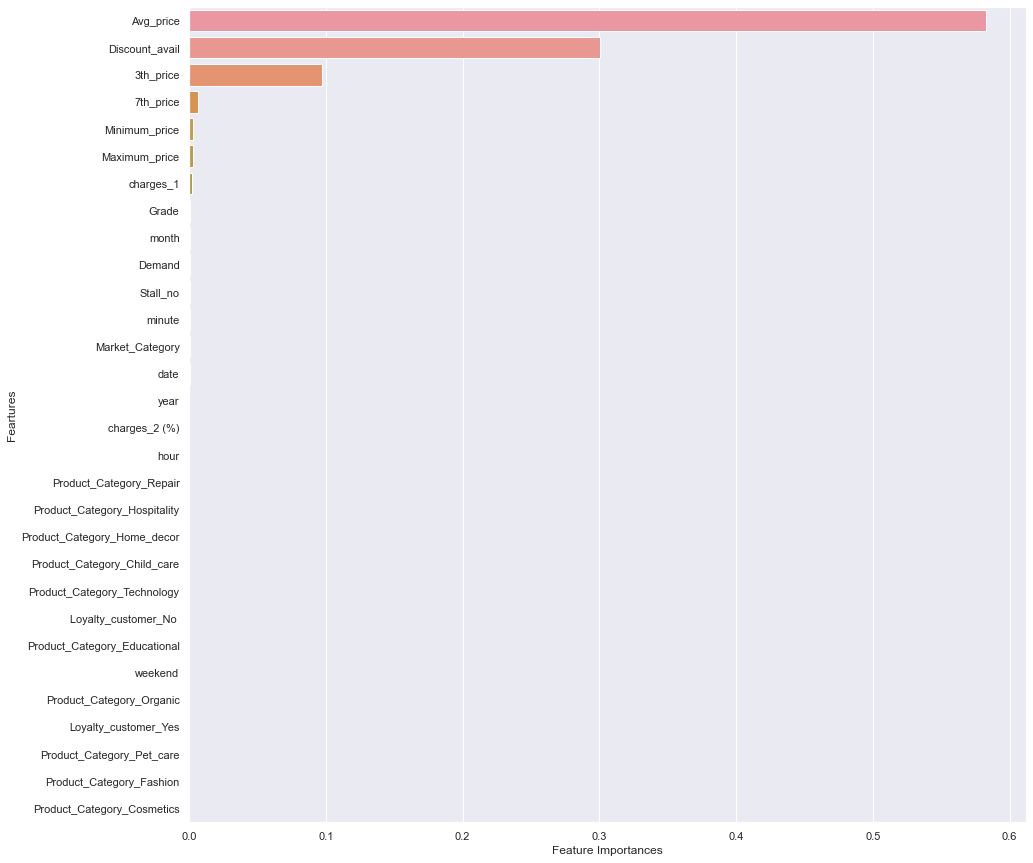

In [213]:
random_df = feature_importance(random , X_train , y_train)

In [214]:
random_df

Feature Importances                     Feartures
0              0.582909                     Avg_price
1              0.300428                Discount_avail
2              0.097295                     3th_price
3              0.006587                     7th_price
4              0.002920                 Minimum_price
5              0.002603                 Maximum_price
6              0.002185                     charges_1
7              0.000961                         Grade
8              0.000621                         month
9              0.000515                        Demand
10             0.000458                      Stall_no
11             0.000420                        minute
12             0.000365               Market_Category
13             0.000311                          date
14             0.000280                          year
15             0.000266                 charges_2 (%)
16             0.000223                          hour
17             0.000100       Product_Category_Repair
18             0.000074  Product_Category_Hospitality
19             0.000066   Product_Category_Home_decor
20             0.000062   Product_Category_Child_care
21             0.000062   Product_Category_Technology
22             0.000062          Loyalty_customer_No 
23             0.000056  Product_Category_Educational
24             0.000047                       weekend
25             0.000037      Product_Category_Organic
26             0.000031          Loyalty_customer_Yes
27             0.000023     Product_Category_Pet_care
28             0.000022      Product_Category_Fashion
29             0.000012    Product_Category_Cosmetics

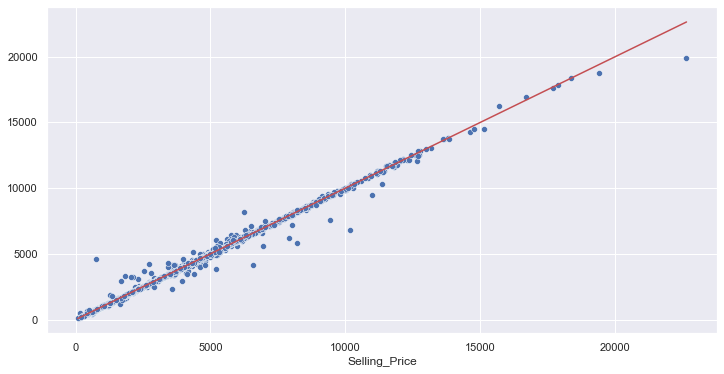

In [215]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(x = y_test , y = random.predict(X_test))
x = np.linspace(min(y_test) , max(y_test) , 100)
y = x
plt.plot(x, y , "-r")

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

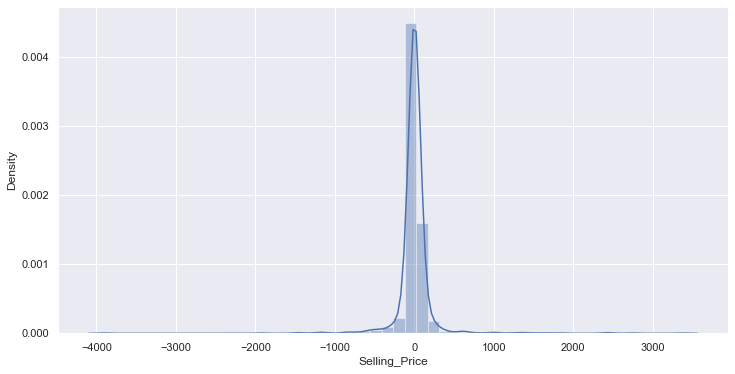

In [216]:
plt.figure(figsize = (12 , 6))
sns.distplot(y_test - random.predict(X_test))

In [217]:
data = {"Product_id" : ids ,
        "Selling_Price" : random.predict(tt)}

In [218]:
final = pd.DataFrame(data)
final

Product_id  Selling_Price
0     SCHE4YSTDVPVZVXW    3288.659763
1     ACCEGCATKHNRXUHW    1953.167216
2     NKCE6GJ5XVJDXNNZ   11826.309344
3     NKCEB8BK3ZXDHDHM    9450.512051
4     TOPEFDXSAHRNPF94    5795.773589
...                ...            ...
3425  BBAE9K7BXFUTDNBK    3960.183035
3426  RTRDYPA4PJHCJCGF    9168.338159
3427  TUNE8FWQBS7TVVT7    5916.838706
3428  NKCEGMUABCRGUZPE    3592.051680
3429  RNGE7M92KAQWUBCS    1008.661382

[3430 rows x 2 columns]

In [219]:
final.to_csv("Submission_random_1.csv" , index = False)